In [1]:
#### Hurricane plots using tropycal library

In [2]:
# uncomment the 2 lines below to install the desired libraries
#%pip install tropycal
#%pip install cartopy

from tropycal import tracks, utils, rain
import matplotlib.pyplot as plt

#Import the dataset
basin = tracks.TrackDataset(include_btk=True)
rain_obj = rain.RainDataset()

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.87 seconds)
--> Starting to read in best track data
--> Completed reading in best track data (7.1 seconds)
--> Starting to read in rainfall data
--> Completed reading in rainfall data (6.97 seconds)


<GeoAxes: title={'left': 'TC Track Composite'}>

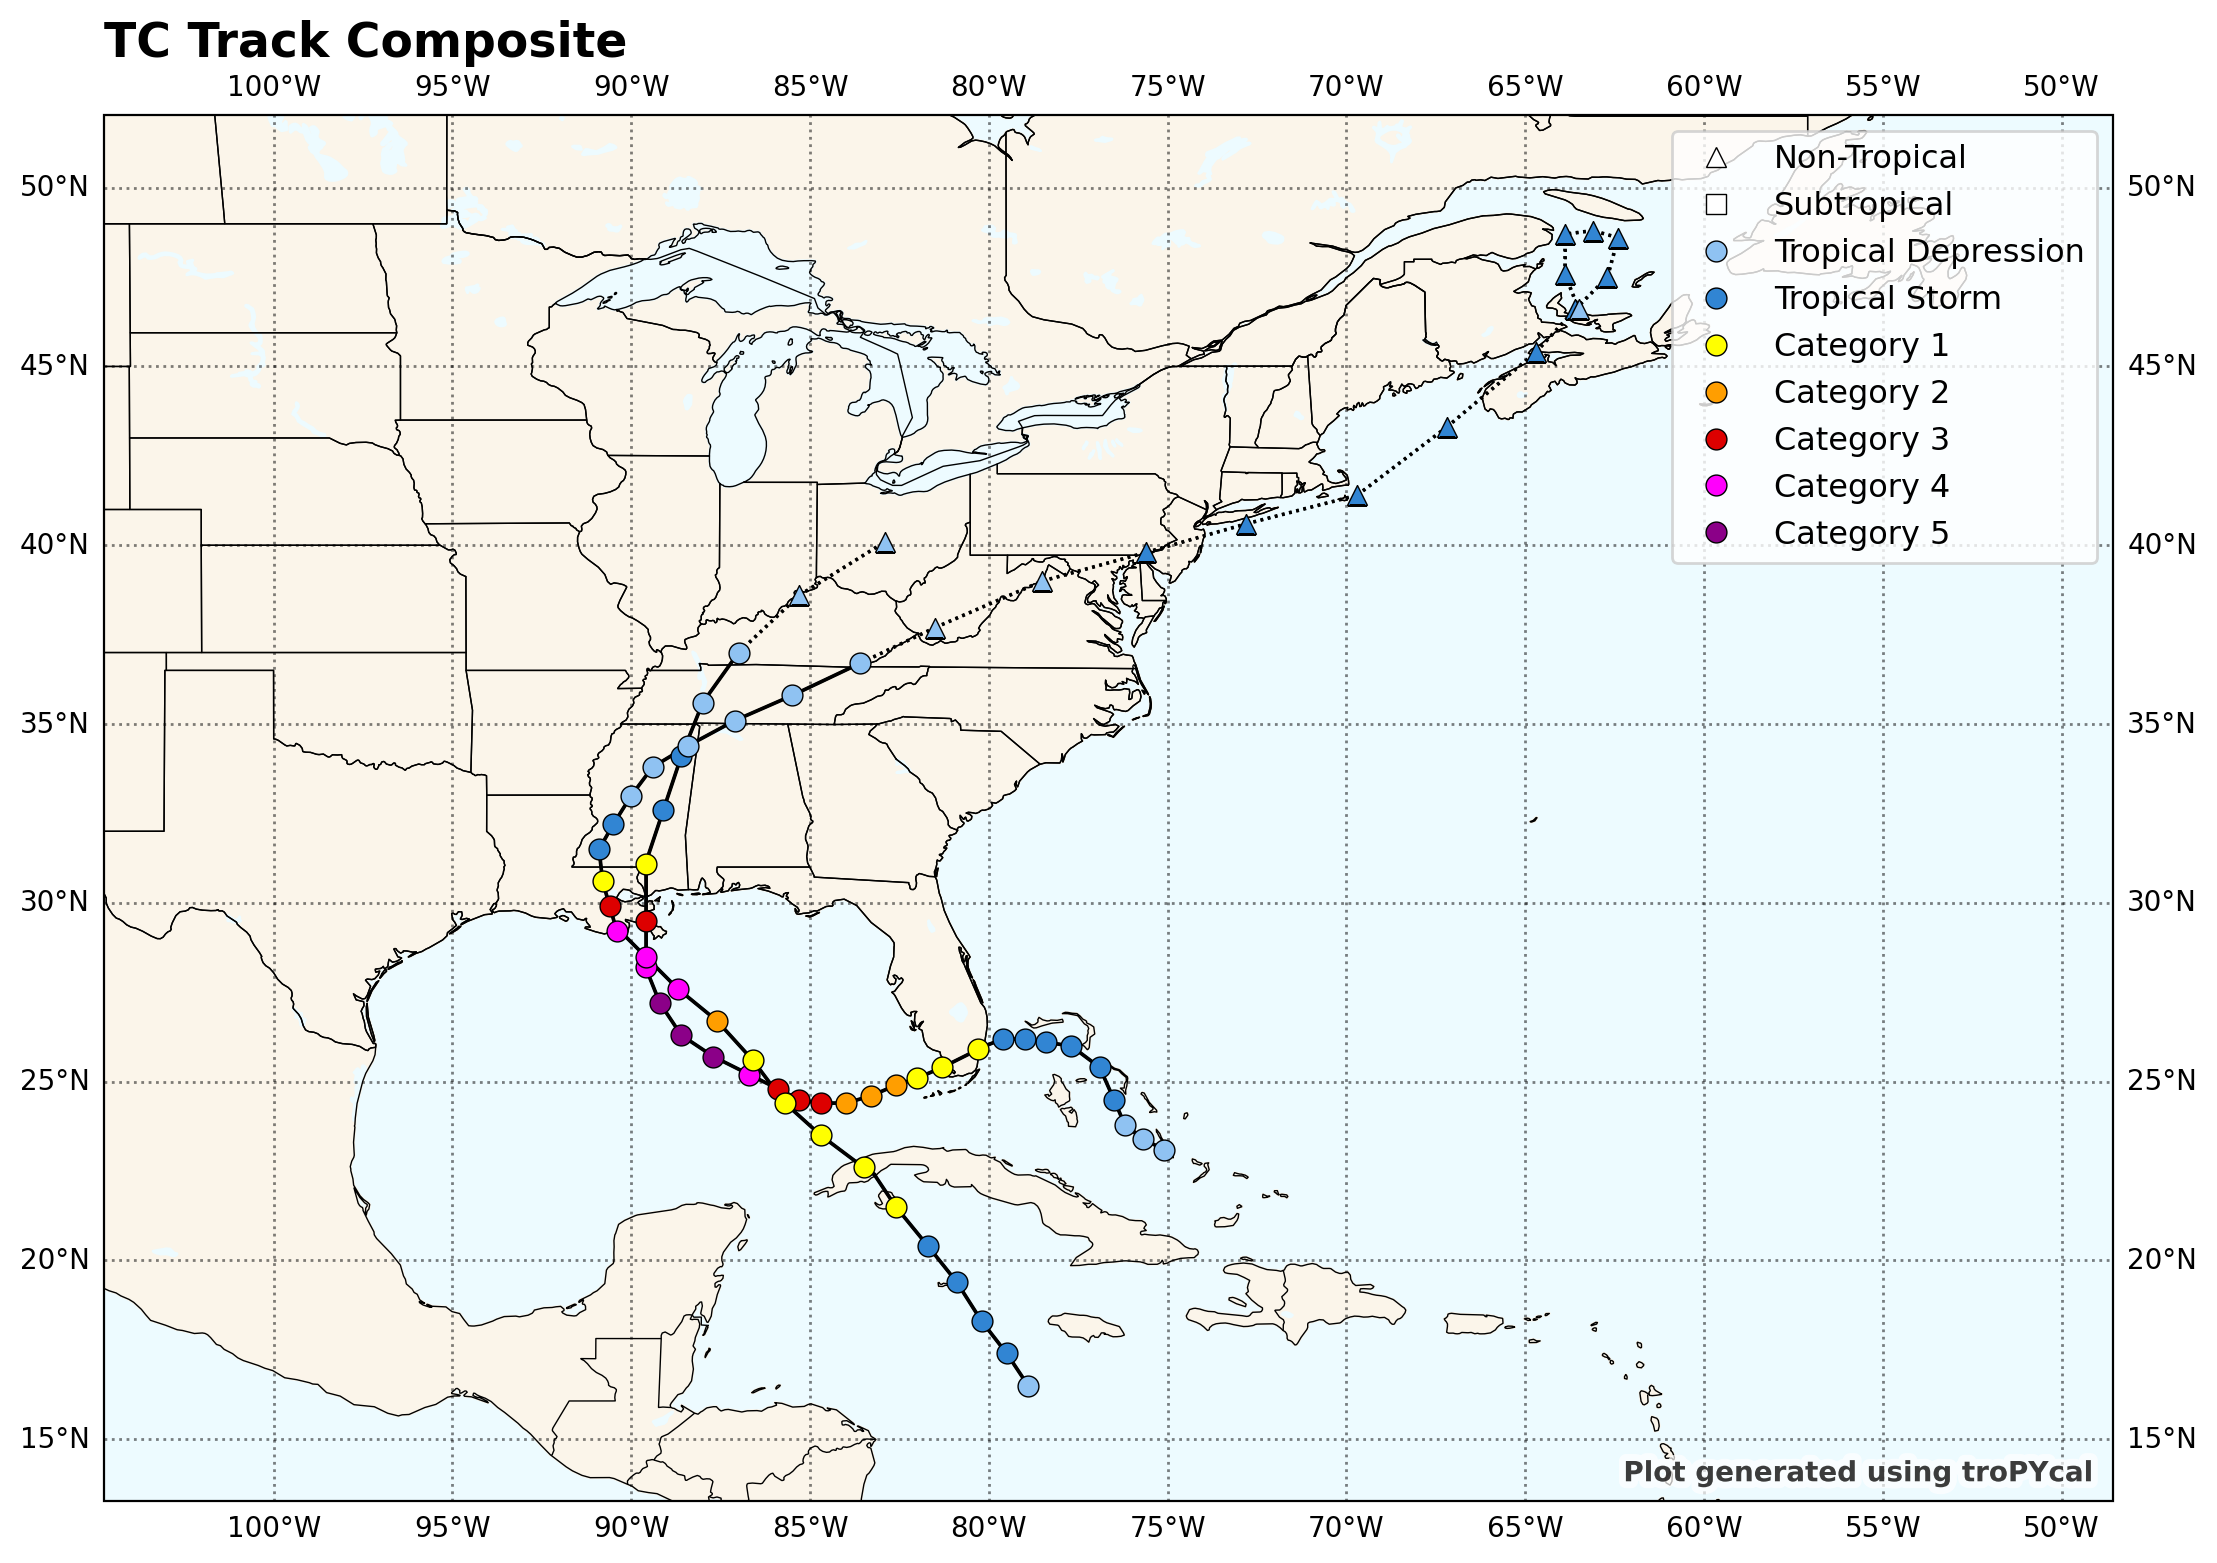

In [3]:
# Just Plotting 2 hurricane path

# For thsi examples, I am using Katrinca from 2005 and Ida from 2021

basin.plot_storms([('katrina',2005),('ida',2021)],labels=True)

In [4]:
# Analyzing the storm data along with rain fall data.
# In the example i use Harvey from 2017

harvey_storm = basin.get_storm(('harvey',2017))
harvey_rain = rain_obj.get_storm_rainfall(harvey_storm)

In [5]:
# Converting to data frame

harvey_storm.to_dataframe()

time  extra_obs special type   lat   lon  vmax  mslp  \
0  2017-08-16 06:00:00          0           LO  13.7 -45.8    25  1013   
1  2017-08-16 12:00:00          0           LO  13.7 -47.4    25  1010   
2  2017-08-16 18:00:00          0           LO  13.6 -49.0    25  1009   
3  2017-08-17 00:00:00          0           LO  13.6 -50.6    25  1010   
4  2017-08-17 06:00:00          0           TD  13.4 -52.0    25  1008   
..                 ...        ...     ...  ...   ...   ...   ...   ...   
69 2017-09-01 12:00:00          0           EX  36.0 -87.1    25  1002   
70 2017-09-01 18:00:00          0           EX  36.5 -86.4    20  1004   
71 2017-09-02 00:00:00          0           EX  37.2 -85.6    20  1007   
72 2017-09-02 06:00:00          0           EX  37.9 -84.9    20  1009   
73 2017-09-02 12:00:00          0           EX  38.2 -84.7    15  1013   

         wmo_basin  
0   north_atlantic  
1   north_atlantic  
2   north_atlantic  
3   north_atlantic  
4   north_atlantic  
..             ...  
69  north_atlantic  
70  north_atlantic  
71  north_atlantic  
72  north_atlantic  
73  north_atlantic  

[74 rows x 9 columns]

In [6]:
# Printing data for rain so as to get min and max to used in the next plot.

#harvey_rain
harvey_rain.sort_values('Total',ascending=False)

Station  Total       Lat         Lon
267161                Nederland 1.5 SW  60.58  29.95000  -94.010000
266354                    Groves 1.3 N  60.54  29.96000  -93.920000
266199                     Friendswood  56.00  29.50000  -95.200000
267575                  Santa Fe 3 ENE  54.77  29.39000  -95.050000
265621                     Friendswood  54.00  29.74510  -95.566600
...                                ...    ...       ...         ...
262820              Whitesville 2.8 SW   0.00  37.65721  -86.908676
262964  NEW ORLEANS                      0.00  29.83000  -90.000000
268358  SUMMERSVILLE             5 SW    0.00  38.22000  -80.880000
268361  TERRA ALTA               1 N     0.00  39.45000  -79.550000
265469  BIG SPRING               1 NNW   0.00  32.27000 -101.490000

[6797 rows x 4 columns]

<GeoAxes: title={'left': 'Hurricane HARVEY\nWPC Storm Rainfall (inch)', 'right': '17 Aug 2017 – 01 Sep 2017\n115 kt • 937 hPa • 11.4 ACE'}>

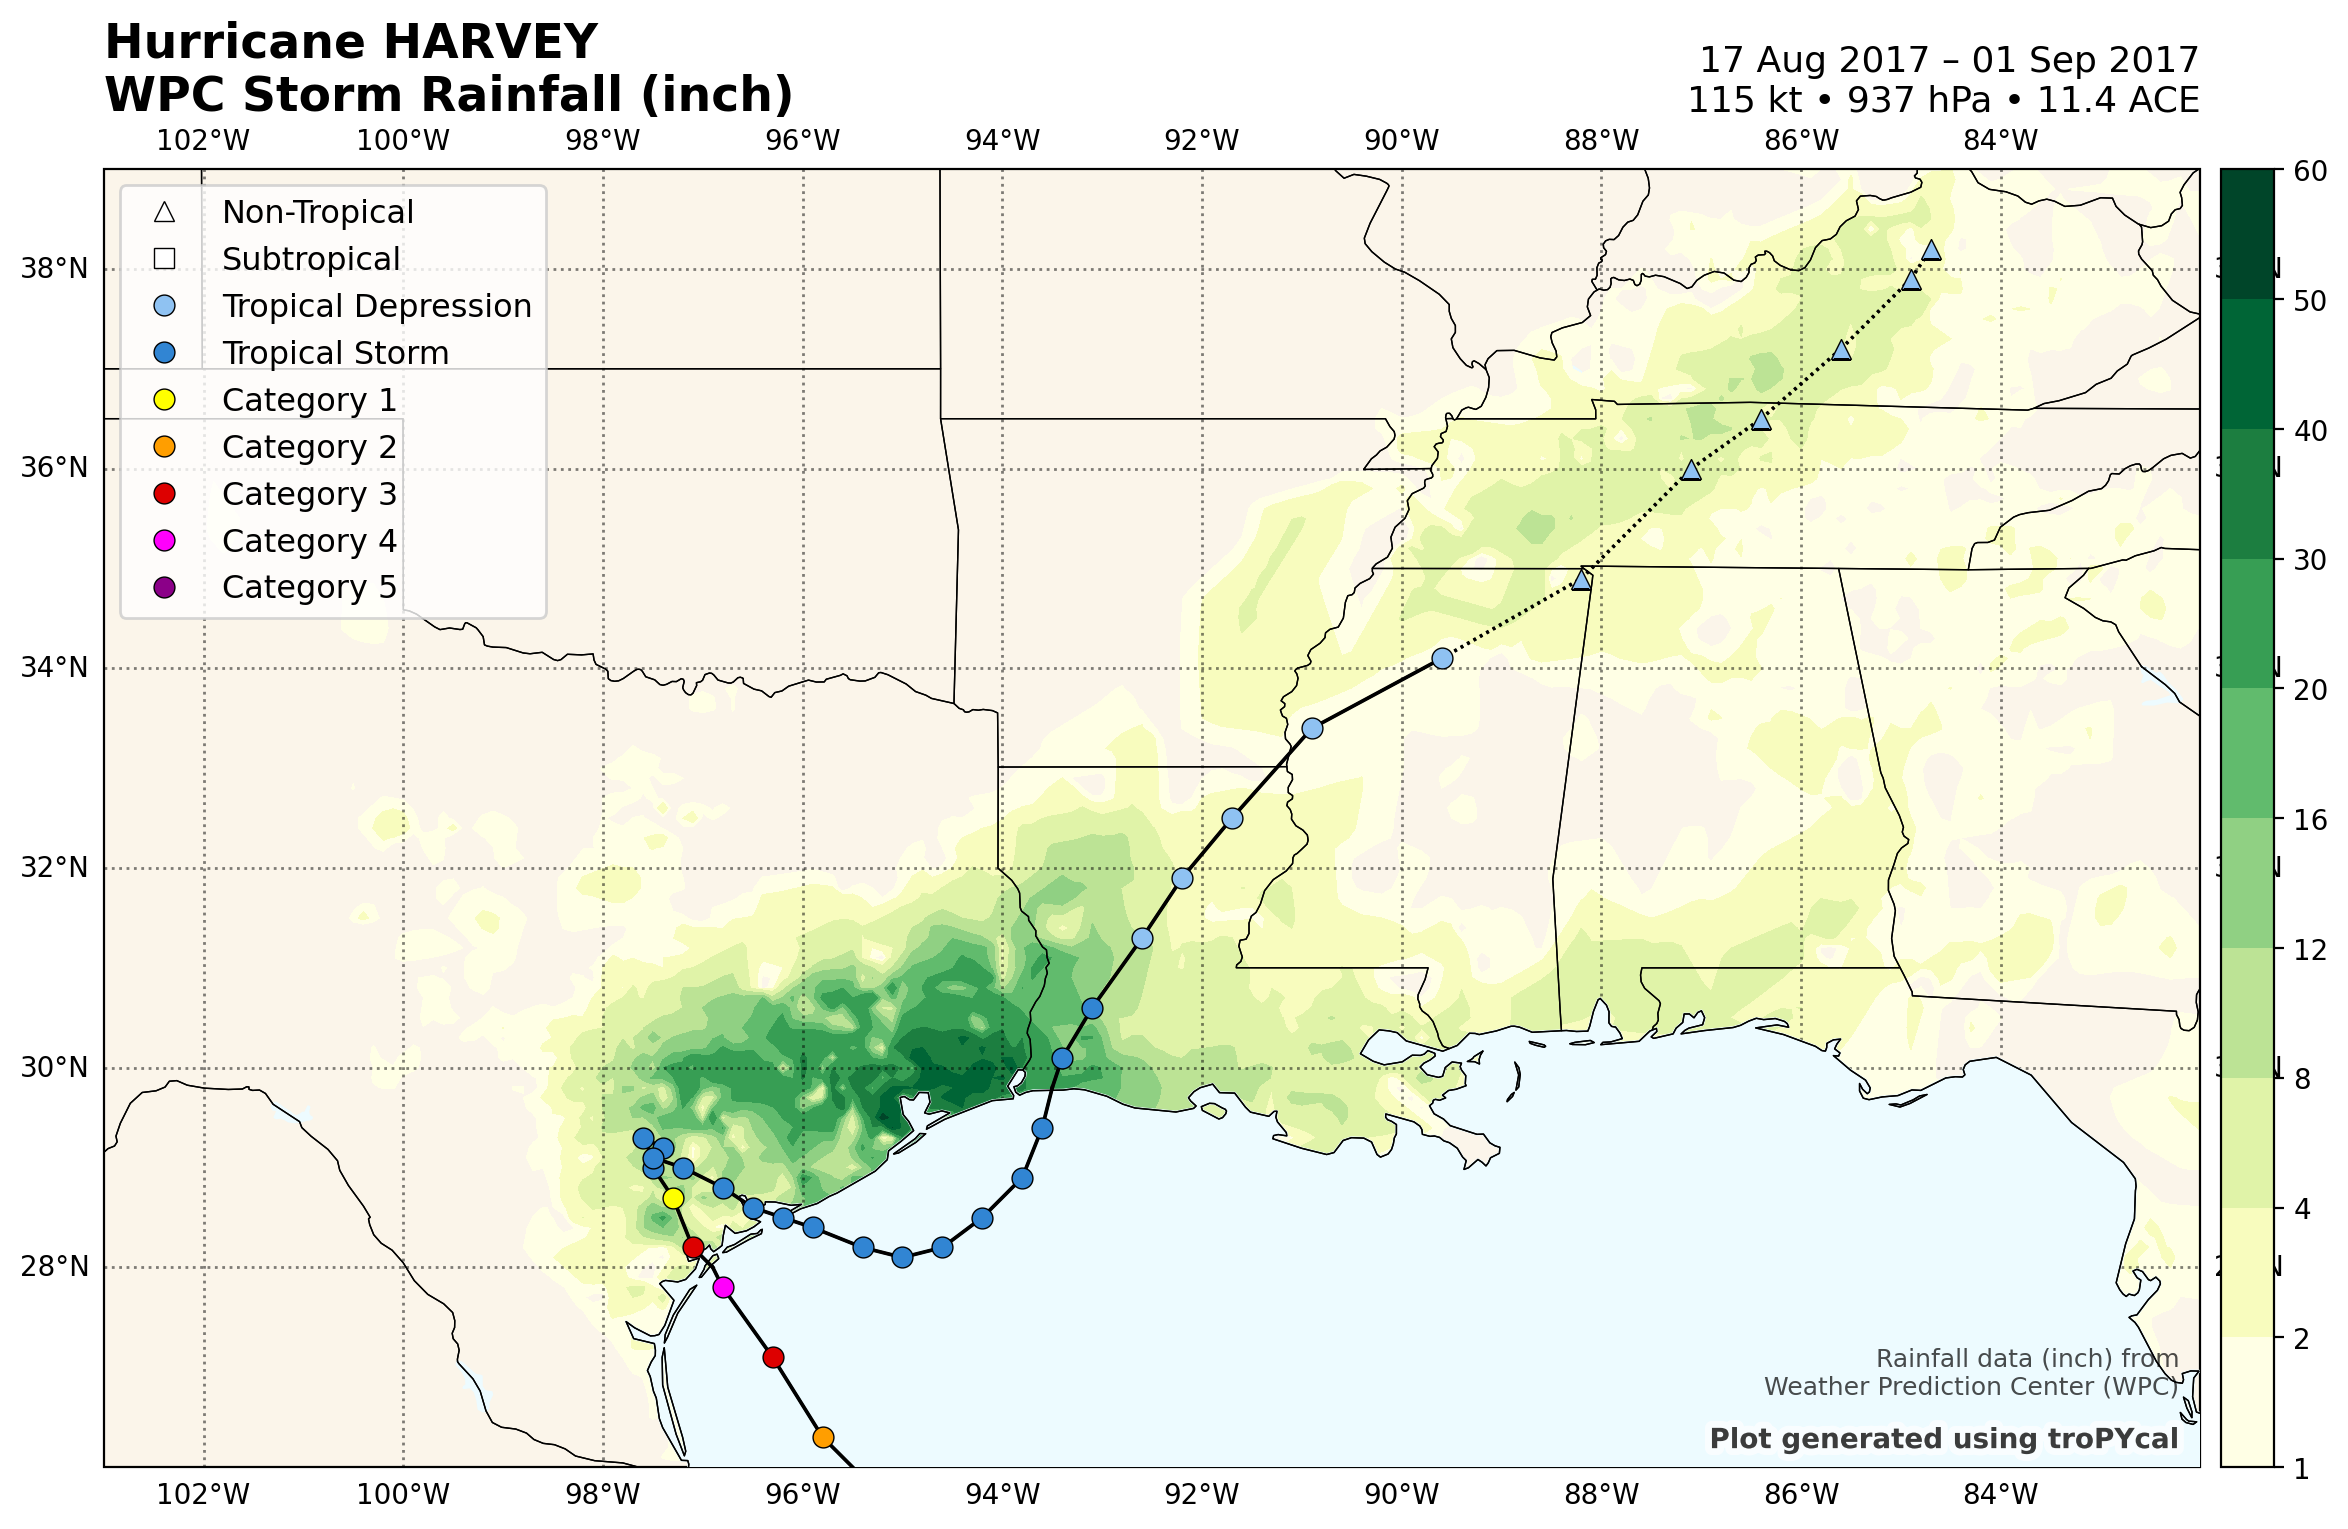

In [7]:
#Interpolate to grid
grid = rain_obj.interpolate_to_grid(harvey_storm,return_xarray=True)

#Plot grid with linear observation
levels = [1,2,4,8,12,16,20,30,40,50,60]
rain_obj.plot_rain_grid(harvey_storm,grid,levels,domain={'s':26,'n':39,'w':-103,'e':-82})

<GeoAxes: title={'left': 'Hurricane HARVEY\nWPC Storm Rainfall (inch)', 'right': '17 Aug 2017 – 01 Sep 2017\n115 kt • 937 hPa • 11.4 ACE'}>

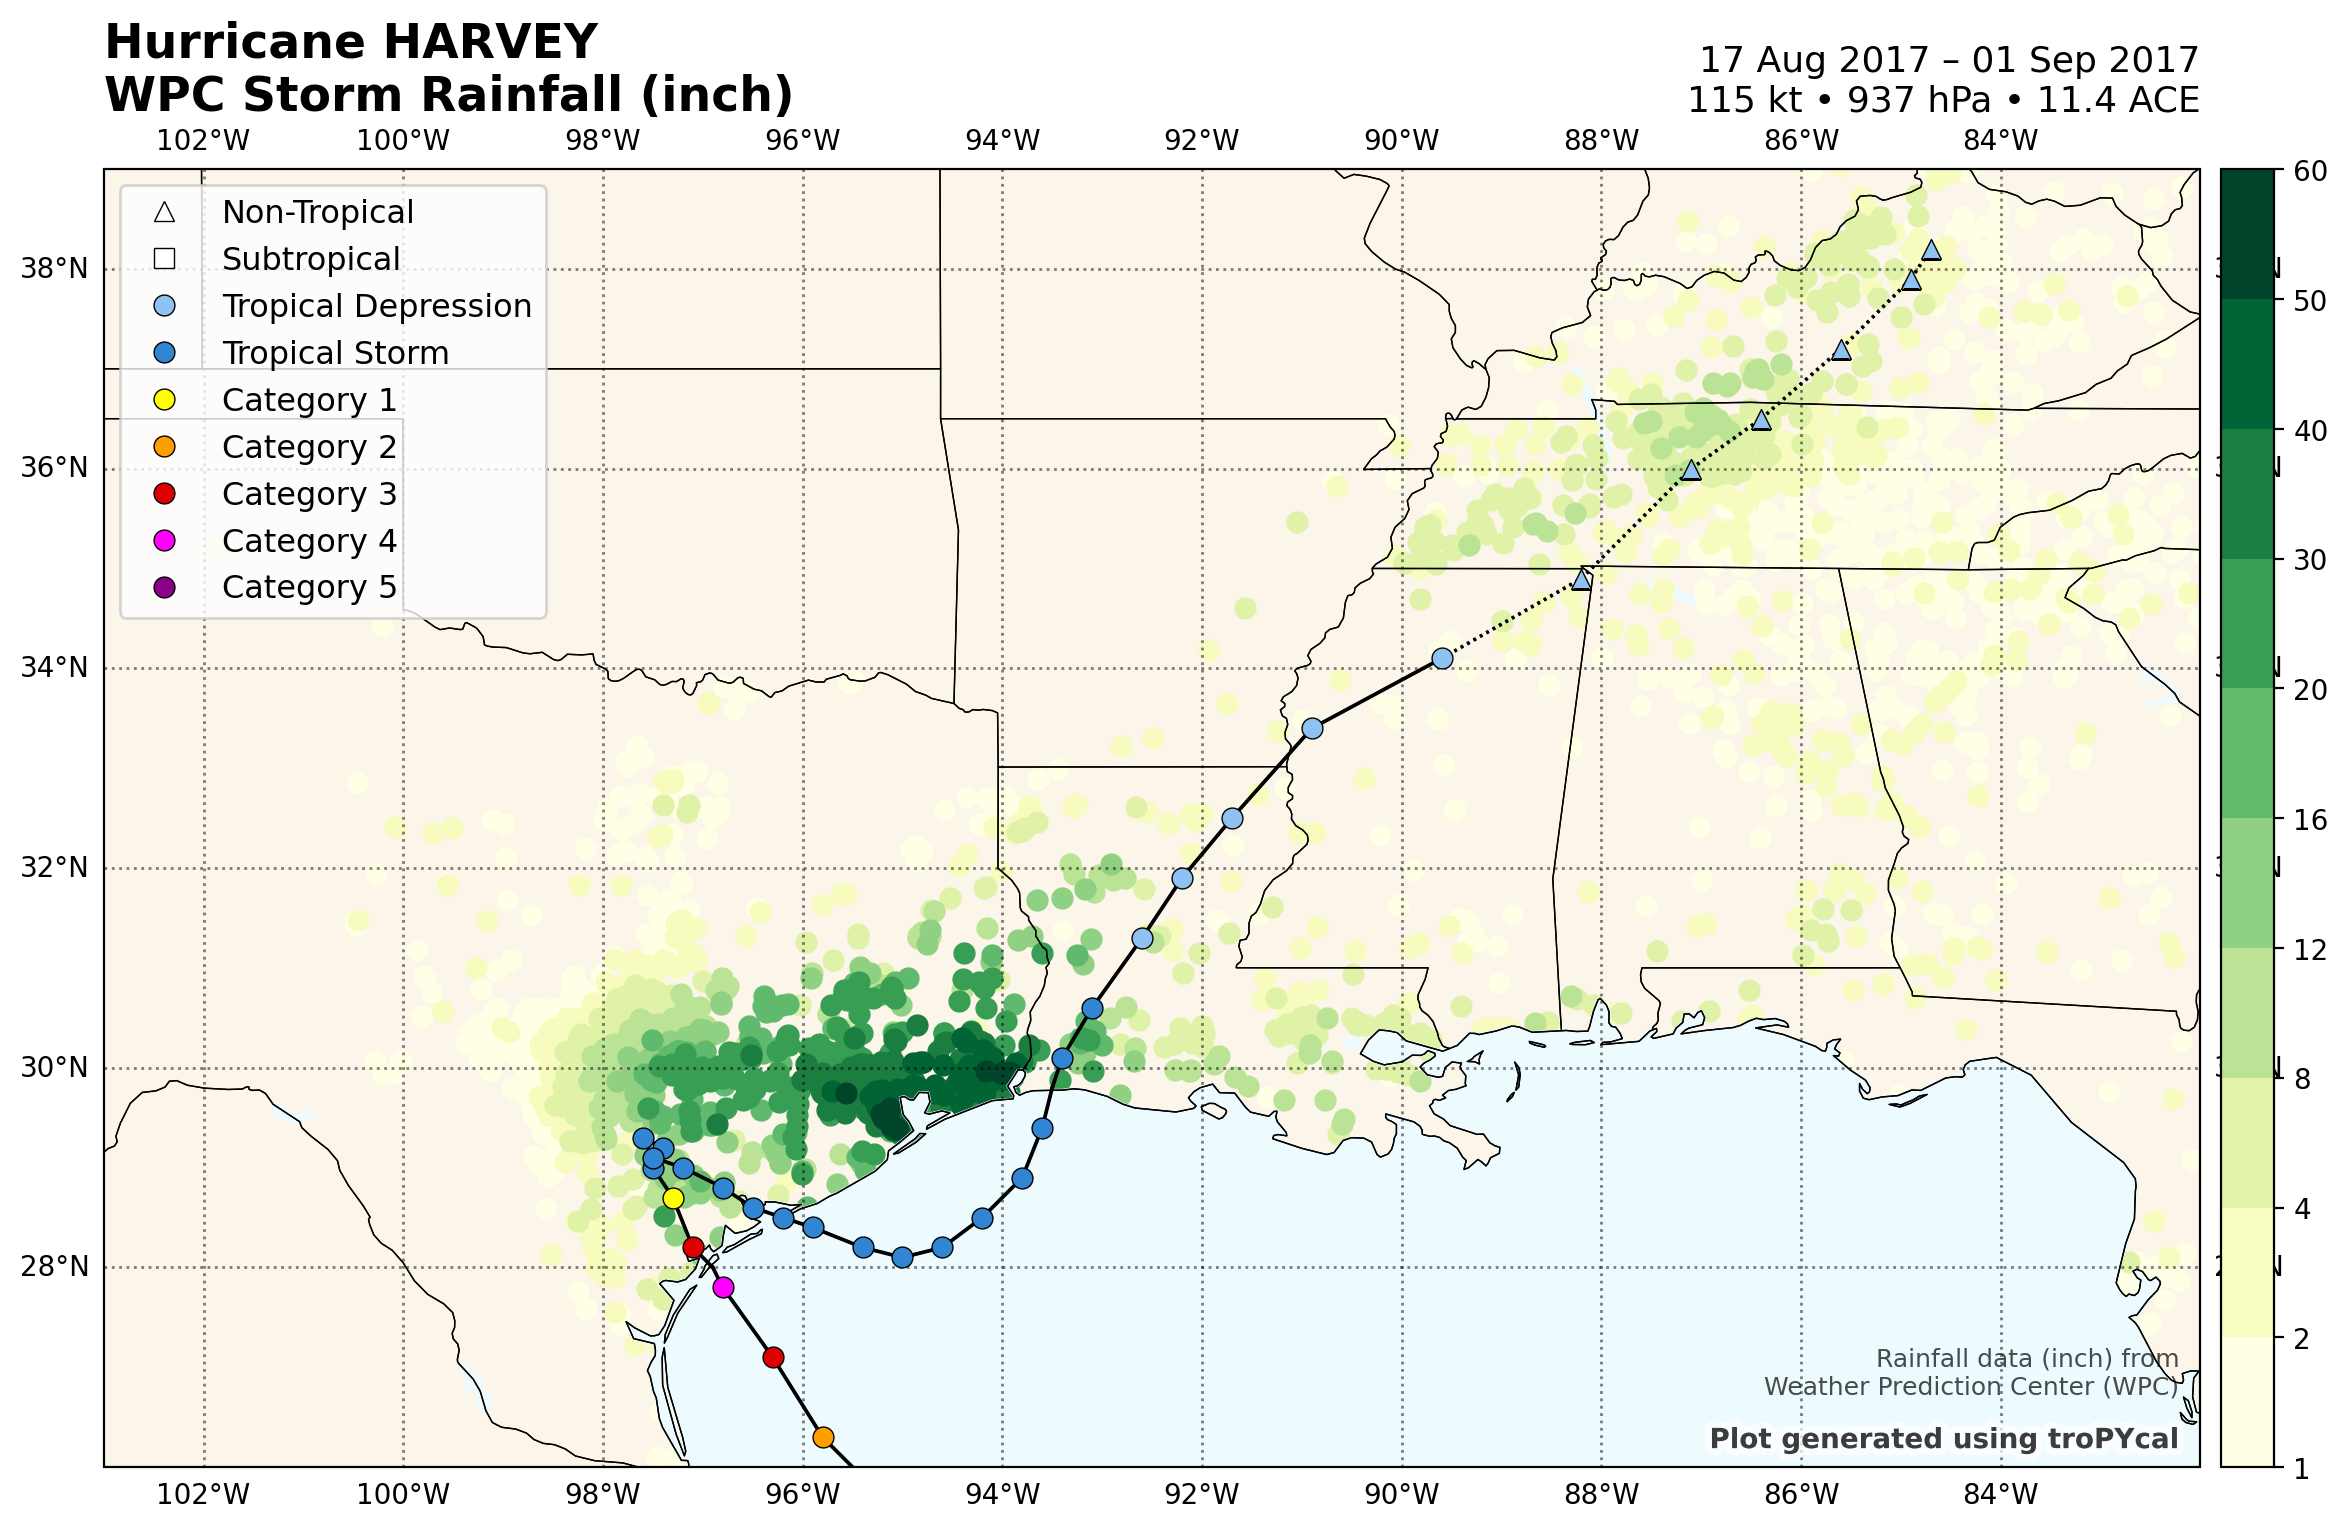

In [8]:
#With intividual observations
levels = [1,2,4,8,12,16,20,30,40,50,60]
rain_obj.plot_rain(harvey_storm,levels=levels,domain={'s':26,'n':39,'w':-103,'e':-82})

In [9]:
# Data for Maria Storm

maria_storm = basin.get_storm(('maria',2017))

# No rain fall data for Maria was available as it is mainly on the island and most of it was over sea.

<GeoAxes: title={'left': 'Hurricane MARIA', 'right': '16 Sep 2017 – 30 Sep 2017\n150 kt • 908 hPa • 44.8 ACE'}>

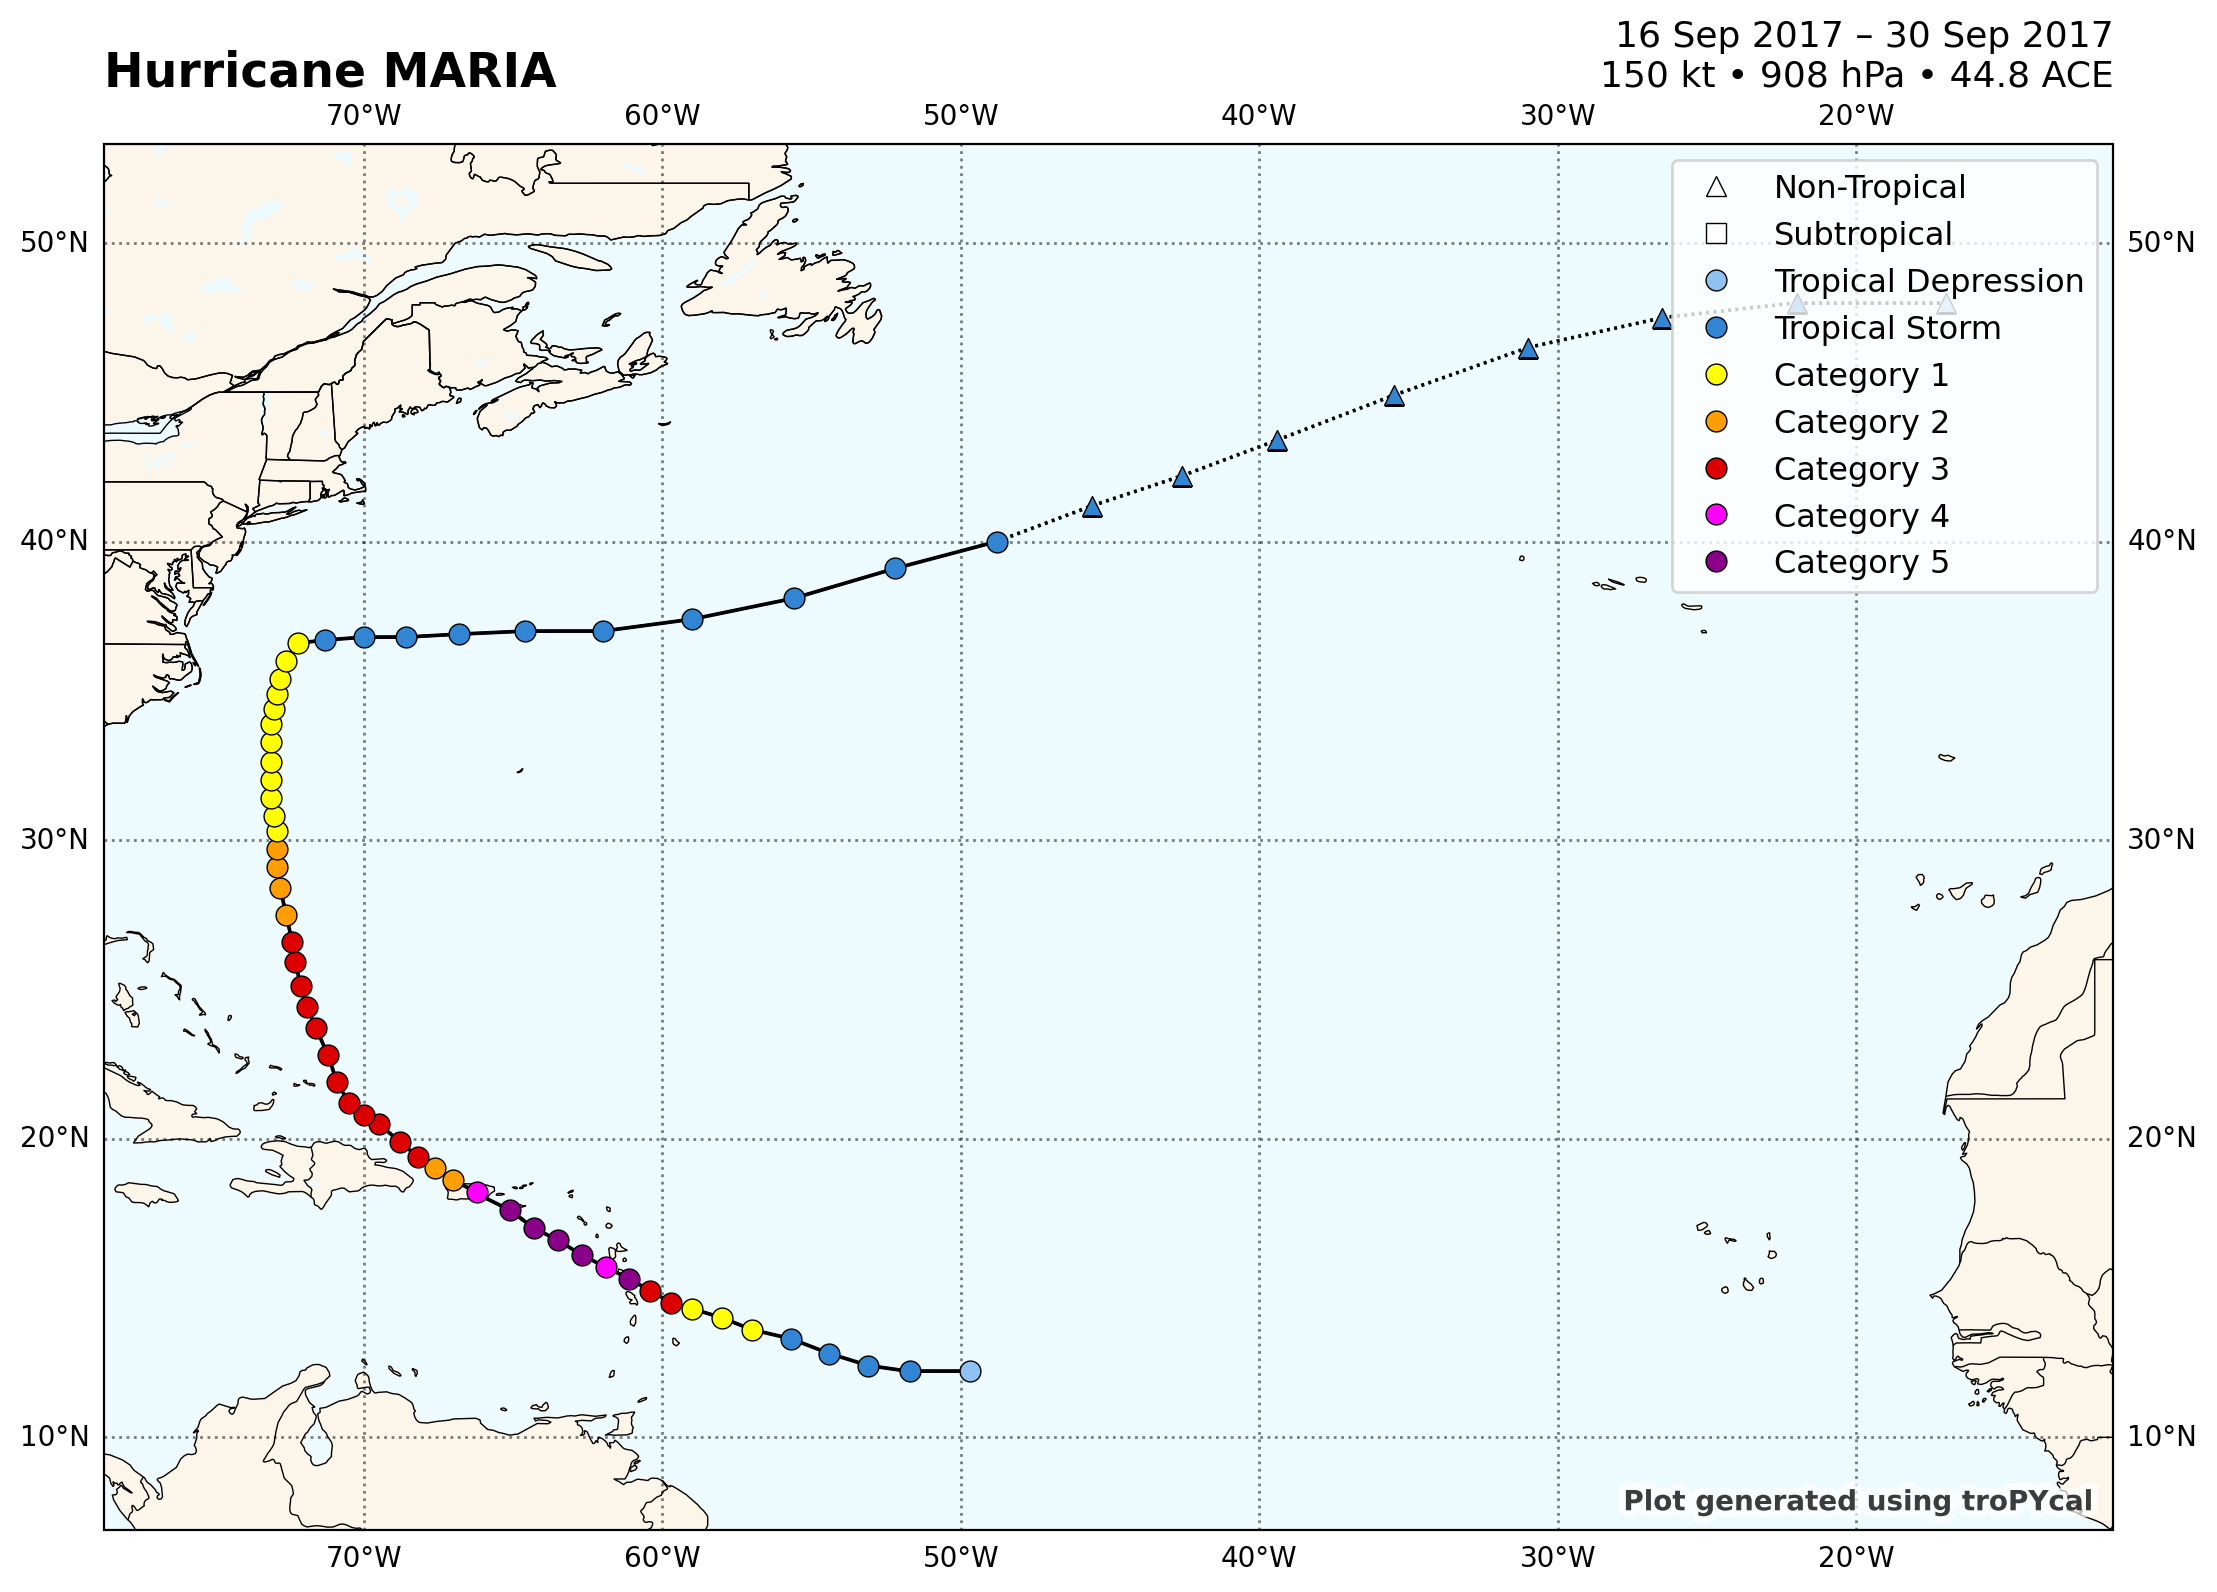

In [10]:
# Plotting the path for Maria
maria_storm.plot()

In [11]:
# Plotting Hurricane Katrina from 2005

katrina_storm = basin.get_storm(('katrina',2005))
katrina_rain = rain_obj.get_storm_rainfall(katrina_storm)

In [12]:
# getting max and min rain fall data to be used for next plot.

katrina_rain.sort_values('Total',ascending=False)

Station  Total        Lat        Lon
360686                    PERRINE 4W FL  16.43  25.580000 -80.440000
361567                BIG BRANCH NWR LA  14.82  30.320000 -89.930000
360594                 HOMESTEAD AFB FL  14.75  25.480000 -80.380000
360568                  FLORIDA CITY FL  12.25  25.473611 -80.414444
360595          HOMESTEAD GEN AV APT FL  11.80  25.500000 -80.550000
...                                 ...    ...        ...        ...
361636  MERIDIAN_10NW/OKATIBBEE RSVR MS   0.01  32.480000 -88.800000
361601                  COLLINSVILLE MS   0.01  32.420000 -88.770000
362146         PHILADELPHIA MT HOLLY NJ   0.01  40.020000 -74.820000
361575    Lillie/Little Corney Bayou LA   0.01  32.929167 -92.632778
361574      Keithville/Cypress Bayou LA   0.01  32.300000 -93.827778

[3174 rows x 4 columns]

<GeoAxes: title={'left': 'Hurricane KATRINA\nWPC Storm Rainfall (inch)', 'right': '23 Aug 2005 – 30 Aug 2005\n150 kt • 902 hPa • 20.0 ACE'}>

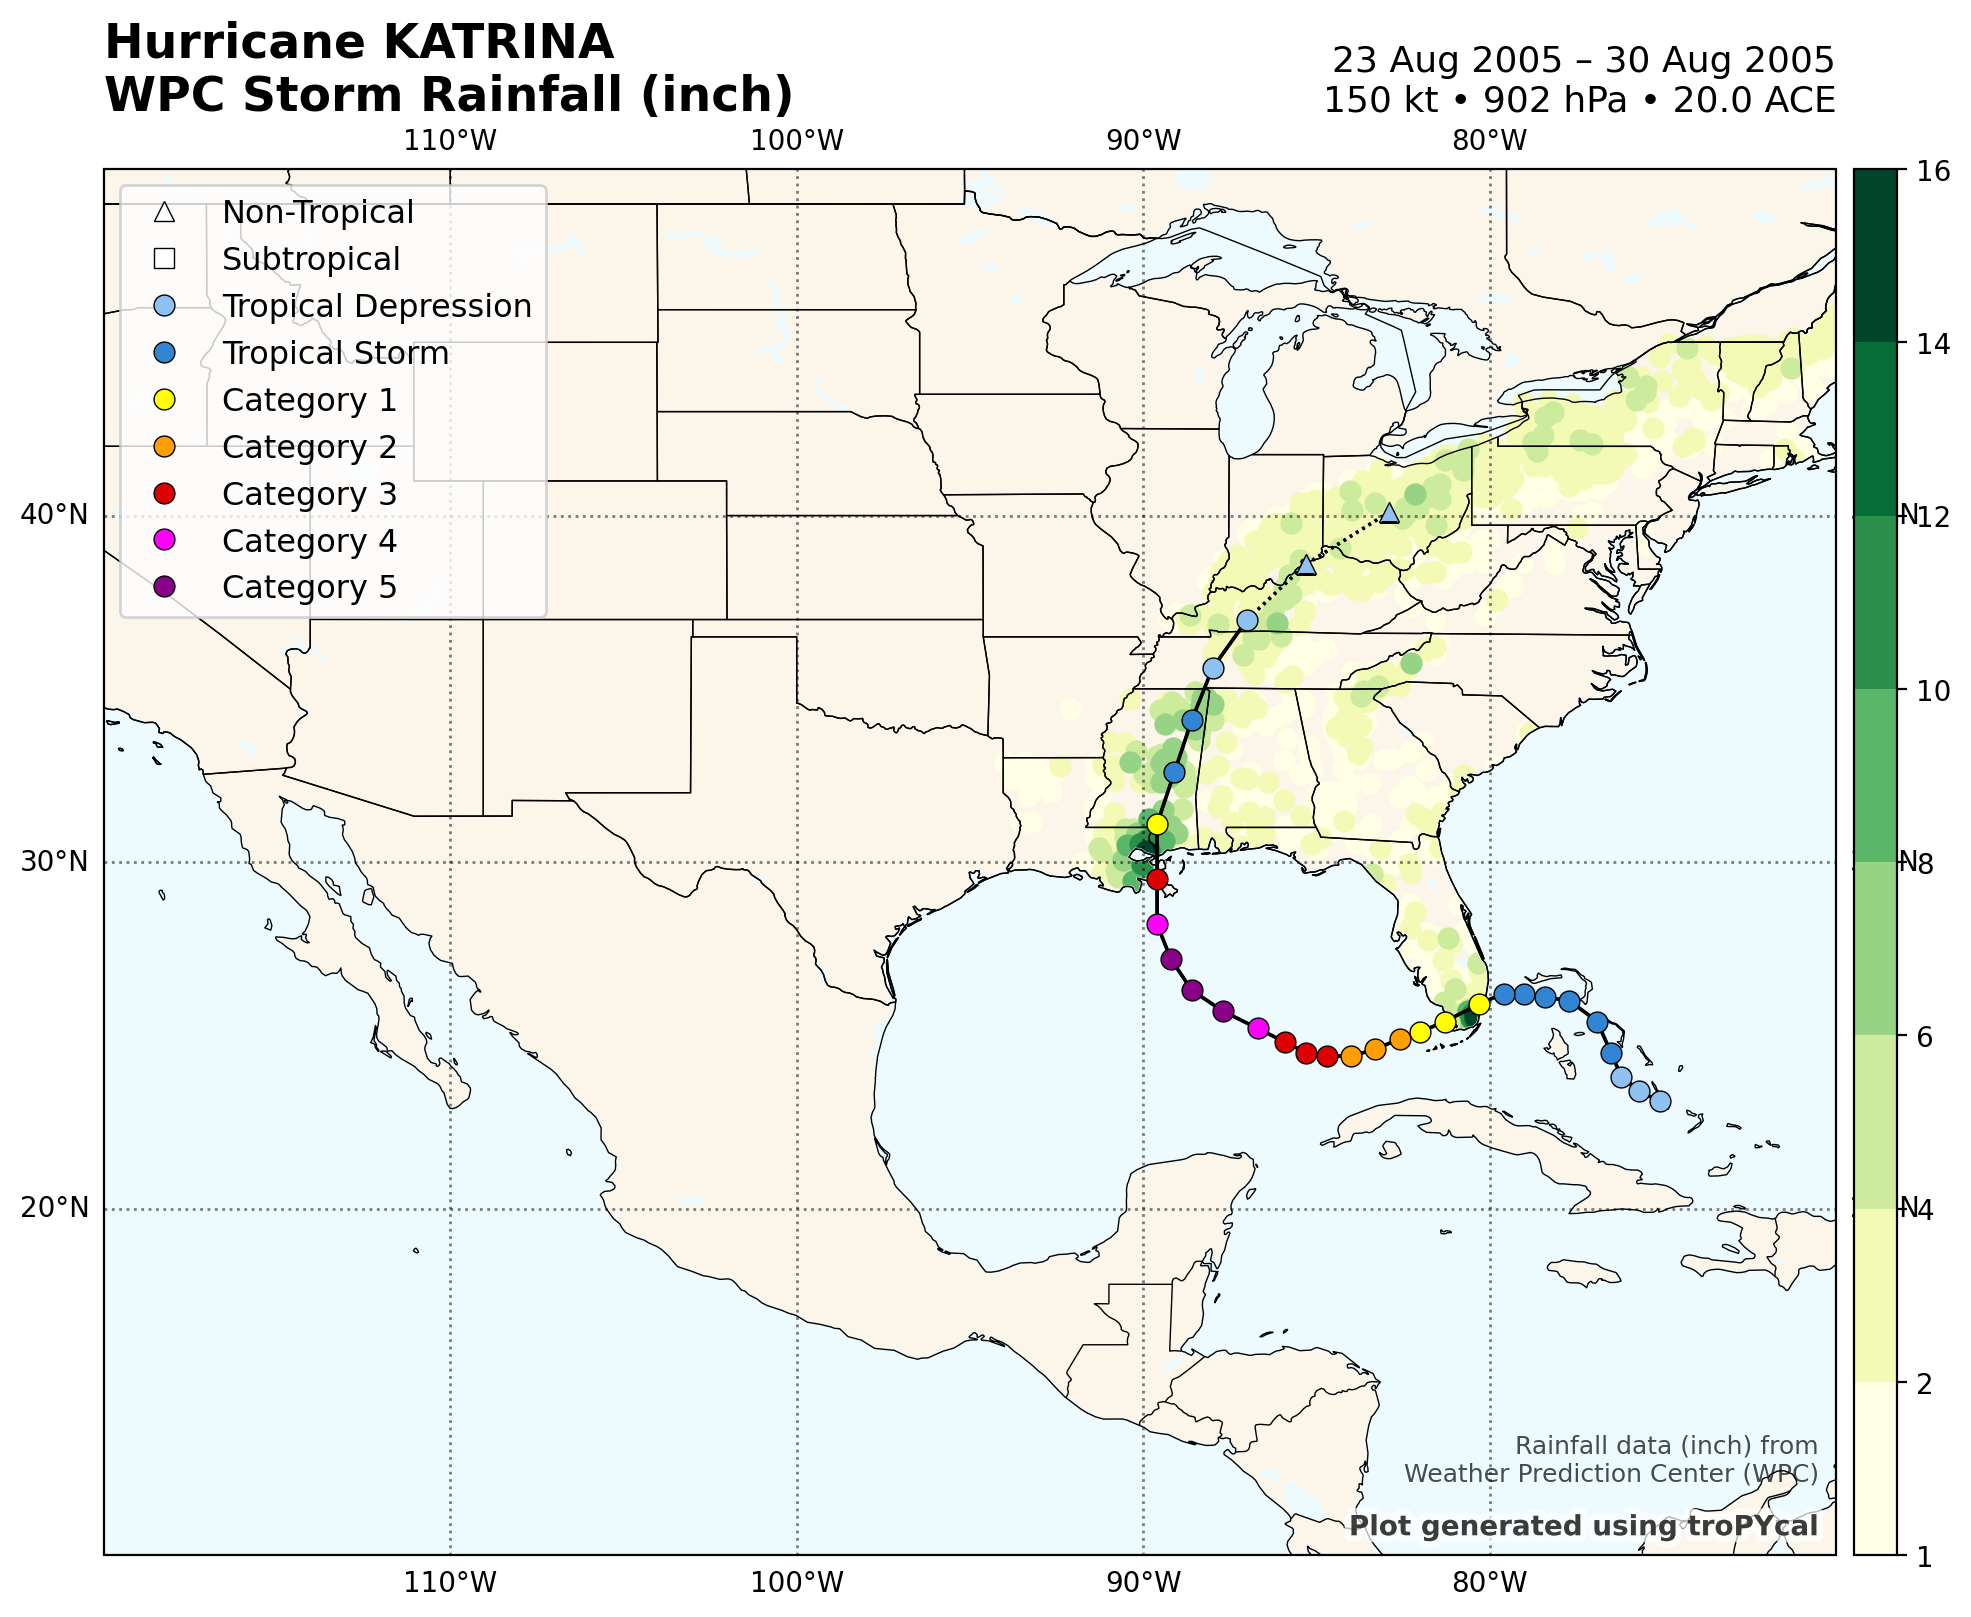

In [13]:
#Plotting path along with rainfall.
levels = [1,2,4,6,8,10,12,14,16]
rain_obj.plot_rain(katrina_storm,levels=levels,domain={'s':10,'n':50,'w':-120,'e':-70})

In [14]:
# Sandy Storm

sandy_storm = basin.get_storm(('sandy',2012))
sandy_rain = rain_obj.get_storm_rainfall(sandy_storm)

In [15]:
#Plot to get the rain fall data mainly max and min.
sandy_rain.sort_values('Total',ascending=False)

Station  Total        Lat        Lon
442400         Bellevue 0.3 NNE  12.83  38.706500 -76.181400
443850        Wildwood Crest NJ  11.91  38.970000 -74.840000
443852   Wildwood Crest 0.6 NNE  11.91  38.979580 -74.832047
443851   Wildwood Crest 0.1 WSW  11.70  38.971681 -74.839760
443705        Middle Twp 4.4 SW  11.41  39.042508 -74.894000
...                         ...    ...        ...        ...
442504   Havre De Grace 4.0 WNW   0.00  39.572150 -76.165780
442625  Wheaton-Glenmont 0.7 NE   0.00  39.063900 -77.043600
442589        Shady Side 1.6 NW   0.00  38.843380 -76.549880
442869         Arapahoe 3.6 ESE   0.00  35.000736 -76.767479
442915            Belmont 0.4 E   0.00  35.249000 -81.033500

[4277 rows x 4 columns]

<GeoAxes: title={'left': 'Hurricane SANDY\nWPC Storm Rainfall (inch)', 'right': '22 Oct 2012 – 29 Oct 2012\n100 kt • 940 hPa • 13.7 ACE'}>

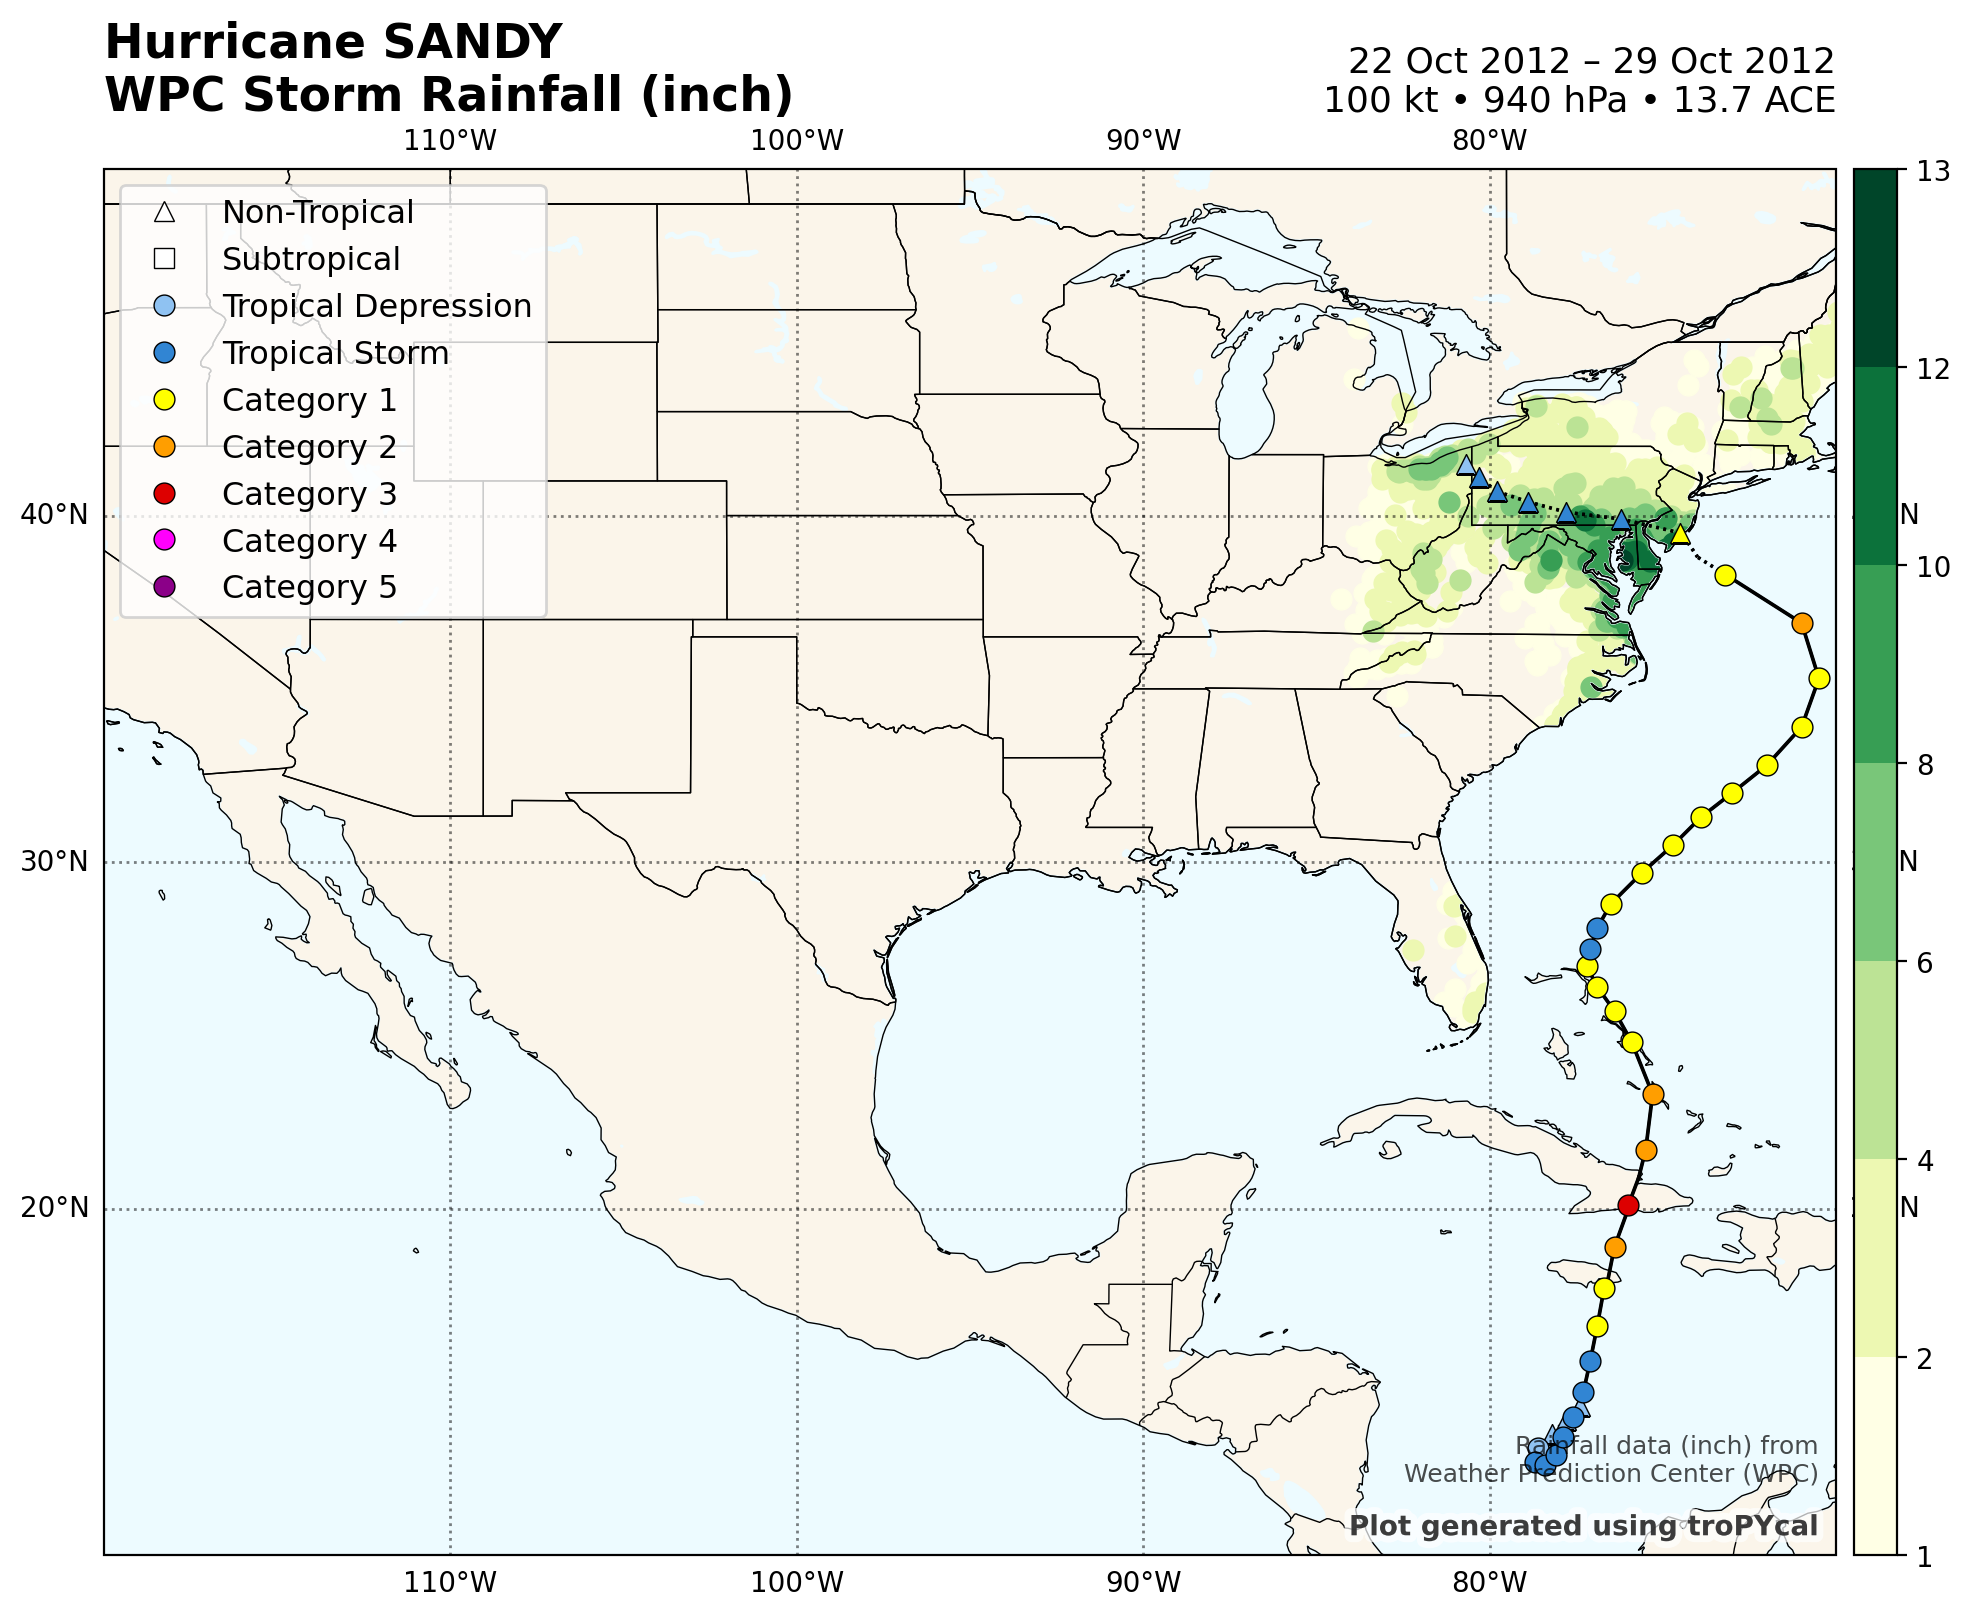

In [16]:
#With individual observations
levels = [1,2,4,6,8,10,12,13]
rain_obj.plot_rain(sandy_storm,levels=levels,domain={'s':10,'n':50,'w':-120,'e':-70})

In [17]:
# below scripts was mainly used to download the data for storm and rainfall.

In [18]:
import tropycal.tracks as tracks
import pandas as pd

# Step 1: Load the entire dataset for the North Atlantic basin
basin = tracks.TrackDataset(basin='north_atlantic', source='hurdat', include_btk=False)

# Step 2: Extract all storm data into a DataFrame
all_storms_data = []

# Extract unique years from the dataset by accessing each storm's data
years = sorted(set([storm_data['year'] for storm_data in basin.data.values()]))

# Loop through each season and each storm to gather the data
for year in years:
    season = basin.get_season(year)
    season_df = season.to_dataframe()
    print(f"Processing storm data for year {year}")
    for index, each_storm in season_df.iterrows():
        # print(each_storm)
        # print(f"Processing data for storm id {storm_id} and year {year}")
        storm_data = basin.get_storm(each_storm['id'])  # Retrieve the storm object
        storm_df = storm_data.to_dataframe()
        storm_df['storm_id'] = each_storm['id']
        storm_df['name'] = each_storm['name']
        storm_df['vmax'] = each_storm['vmax']
        storm_df['mslp'] = each_storm['mslp']
        storm_df['category'] = each_storm['category']
        storm_df['ace'] = each_storm['ace']
        storm_df['end_time'] = each_storm['end_time']
        storm_df['start_lat'] = each_storm['start_lat']
        storm_df['start_lon'] = each_storm['start_lon']
        
        all_storms_data.append(storm_df)
        # print(f"Completed processing data for storm id {storm_id} and year {year}")
    print(f"Completed processing storm data for year {year}")
# Combine all individual storm DataFrames into one
all_storms_df = pd.concat(all_storms_data, ignore_index=True)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.73 seconds)
Processing storm data for year 1851
Completed processing storm data for year 1851
Processing storm data for year 1852
Completed processing storm data for year 1852
Processing storm data for year 1853
Completed processing storm data for year 1853
Processing storm data for year 1854
Completed processing storm data for year 1854
Processing storm data for year 1855
Completed processing storm data for year 1855
Processing storm data for year 1856
Completed processing storm data for year 1856
Processing storm data for year 1857
Completed processing storm data for year 1857
Processing storm data for year 1858
Completed processing storm data for year 1858
Processing storm data for year 1859
Completed processing storm data for year 1859
Processing storm data for year 1860
Completed processing storm data for year 1860
Processing storm data for year 1861
Completed processing storm data for year 1861
Processi

In [19]:
season_df

id        name  vmax  mslp  category   ace          start_time  \
0   AL012023     UNNAMED    60   976         0   1.4 2023-01-16 12:00:00   
1   AL022023      ARLENE    35   998         0   0.5 2023-06-01 12:00:00   
2   AL032023        BRET    60   996         0   4.5 2023-06-19 06:00:00   
3   AL042023       CINDY    50  1004         0   2.5 2023-06-22 00:00:00   
4   AL052023         DON    65   986         1   6.7 2023-07-14 00:00:00   
5   AL062023        GERT    50   998         0   2.7 2023-08-19 06:00:00   
6   AL072023       EMILY    45   998         0   0.8 2023-08-20 00:00:00   
7   AL082023    FRANKLIN   130   926         4  26.4 2023-08-20 06:00:00   
8   AL092023      HAROLD    50   995         0   0.6 2023-08-21 18:00:00   
9   AL102023      IDALIA   115   942         4   7.1 2023-08-26 12:00:00   
10  AL112023        JOSE    55   996         0   1.8 2023-08-29 00:00:00   
11  AL122023       KATIA    50   998         0   1.3 2023-08-31 18:00:00   
12  AL132023         LEE   145   926         5  36.7 2023-09-05 12:00:00   
13  AL142023      MARGOT    80   969         1  12.5 2023-09-07 12:00:00   
14  AL152023       NIGEL    85   971         2  10.5 2023-09-15 06:00:00   
15  AL162023     OPHELIA    60   981         0   1.5 2023-09-22 18:00:00   
16  AL172023    PHILIPPE    50   998         0   9.6 2023-09-23 06:00:00   
17  AL182023        RINA    45   999         0   2.2 2023-09-28 06:00:00   
18  AL192023        SEAN    40  1005         0   1.3 2023-10-10 18:00:00   
19  AL202023       TAMMY    95   965         2  17.4 2023-10-18 18:00:00   
20  AL212023  TWENTY-ONE    25  1007        -1   0.0 2023-10-23 12:00:00   

              end_time  start_lat  start_lon  
0  2023-01-17 12:45:00       37.1      -66.1  
1  2023-06-03 06:00:00       27.7      -86.2  
2  2023-06-24 12:00:00       10.7      -37.3  
3  2023-06-26 00:00:00       10.4      -39.9  
4  2023-07-24 00:00:00       32.5      -46.7  
5  2023-09-04 06:00:00       15.4      -47.8  
6  2023-08-21 00:00:00       18.0      -36.7  
7  2023-09-01 12:00:00       13.5      -63.7  
8  2023-08-23 06:00:00       25.0      -90.8  
9  2023-08-31 06:00:00       20.8      -86.1  
10 2023-09-01 18:00:00       27.7      -51.7  
11 2023-09-04 00:00:00       17.0      -27.0  
12 2023-09-16 00:00:00       12.2      -39.6  
13 2023-09-16 18:00:00       15.5      -26.0  
14 2023-09-22 00:00:00       13.6      -42.2  
15 2023-09-23 18:00:00       32.7      -76.1  
16 2023-10-06 06:00:00       15.5      -36.6  
17 2023-10-01 12:00:00       15.6      -44.5  
18 2023-10-15 06:00:00        9.6      -30.2  
19 2023-10-28 18:00:00       12.9      -51.0  
20 2023-10-24 06:00:00       11.4      -82.6

In [20]:
all_storms_df.shape

(54749, 16)

In [21]:
all_storms_df.to_csv('storm_only_data.csv',index=False)

In [23]:
all_storms_rain_df

Station  Total     Lat     Lon  storm_id     name  vmax  \
0                   HYPOLUXO   5.69  26.550 -80.050  AL011900  UNNAMED   125   
1                 PLANT CITY   4.72  28.024 -82.142  AL011900  UNNAMED   125   
2        KISSIMMEE CITY HALL   3.15  28.300 -81.400  AL011900  UNNAMED   125   
3             MERRITT ISLAND   2.67  28.350 -80.700  AL011900  UNNAMED   125   
4       ORLANDO EXECUTIVE AP   3.77  28.545 -81.333  AL011900  UNNAMED   125   
...                      ...    ...     ...     ...       ...      ...   ...   
606952         BEAUFORT MCAS   0.00  32.500 -80.750  AL252020    GAMMA    65   
606953           SUMMERVILLE   0.00  32.980 -80.180  AL252020    GAMMA    65   
606954       HARDEEVILLE 13S   0.02  32.090 -81.100  AL252020    GAMMA    65   
606955        WALTERBORO 2SW   0.00  32.880 -80.680  AL252020    GAMMA    65   
606956           FURMAN 1 SW   0.00  32.680 -81.200  AL252020    GAMMA    65   

         mslp  category   ace            end_time  start_lat  start_lon  
0       936.0         4  22.5 1900-09-11 06:00:00       15.0      -42.1  
1       936.0         4  22.5 1900-09-11 06:00:00       15.0      -42.1  
2       936.0         4  22.5 1900-09-11 06:00:00       15.0      -42.1  
3       936.0         4  22.5 1900-09-11 06:00:00       15.0      -42.1  
4       936.0         4  22.5 1900-09-11 06:00:00       15.0      -42.1  
...       ...       ...   ...                 ...        ...        ...  
606952  978.0         1   2.8 2020-10-06 12:00:00       17.2      -83.9  
606953  978.0         1   2.8 2020-10-06 12:00:00       17.2      -83.9  
606954  978.0         1   2.8 2020-10-06 12:00:00       17.2      -83.9  
606955  978.0         1   2.8 2020-10-06 12:00:00       17.2      -83.9  
606956  978.0         1   2.8 2020-10-06 12:00:00       17.2      -83.9  

[606957 rows x 13 columns]

In [24]:
all_storms_rain_df.to_csv('all_storms_rain_df.csv',index=False)

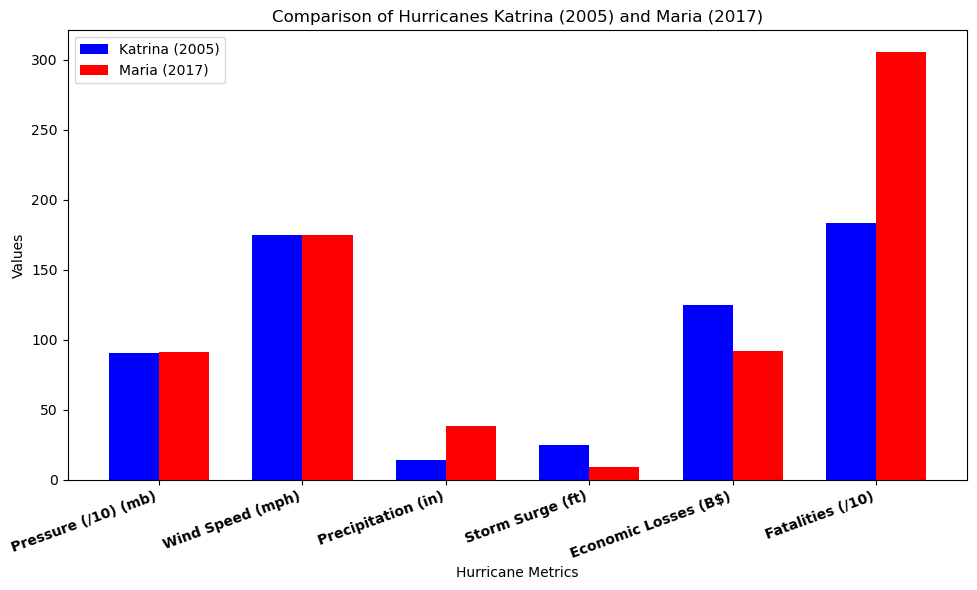

In [25]:
#Maria and Katrina comparison
#Install libraries

import matplotlib.pyplot as plt
import numpy as np

#Make a list of required attributes for the 2 hurricanes
# categories and  data
categories_updated = ["Pressure (/10) (mb)", "Wind Speed (mph)", "Precipitation (in)", "Storm Surge (ft)",
                      "Economic Losses (B$)", "Fatalities (/10)"]

# Data extracted from NOA and used chatgpt help for some syntax
katrina_2005_updated = [90.2, 175, 14, 25, 125, 183.6]  
maria_2017_updated = [90.8, 175, 37.9, 9, 91.6, 305.7]  

x_updated = np.arange(len(categories_updated))  
width = 0.35  

# Create bar plot with updated data
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x_updated - width/2, katrina_2005_updated, width, label="Katrina (2005)", color='b')
bars2 = ax.bar(x_updated + width/2, maria_2017_updated, width, label="Maria (2017)", color='r')

# Labels and titles
ax.set_xlabel("Hurricane Metrics")
ax.set_ylabel("Values")
ax.set_title("Comparison of Hurricanes Katrina (2005) and Maria (2017)")
ax.set_xticks(x_updated)
ax.set_xticklabels(categories_updated, rotation=20, ha="right", fontweight="bold")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()